In [1]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import pandas as pd
from sklearn.datasets import make_blobs



C:\Users\vfriedrich\Anaconda3\envs\gating_env_local\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n_features = 12
X,y = make_blobs(5000, n_features=n_features, centers=3,cluster_std = 3)

var_names = []
for j in range(1,n_features+1):
    var_names.append('feature_' +str(j))
    
adata = ann.AnnData(X=X)
adata.var.index = var_names    



In [3]:
sc.pp.neighbors(adata)
sc.tl.louvain(adata)



           hierarchy_1  hierarchy_2
f1            0.980428     0.980416
recall        0.962185     0.961585
precision     0.999377     1.000000


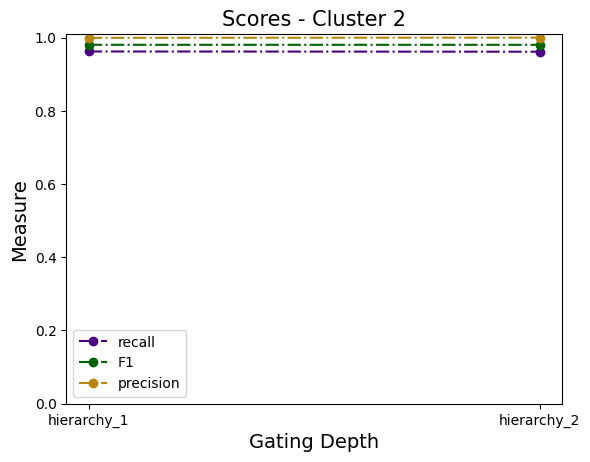

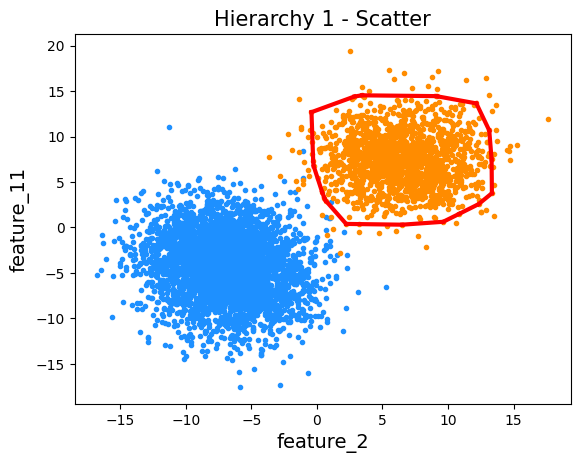

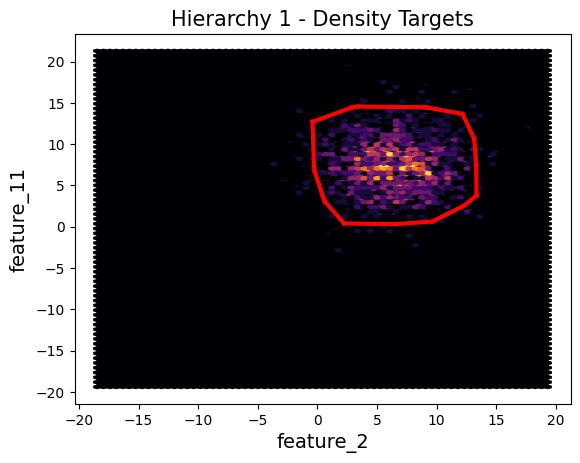

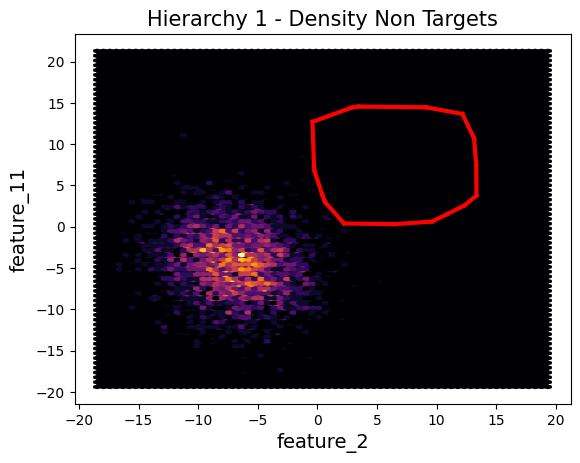

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.793725     0.898121     0.898283     0.897919     0.896825
recall        0.819436     0.817037     0.815837     0.815237     0.813437
precision     0.769577     0.997072     0.999265     0.999265     0.999263


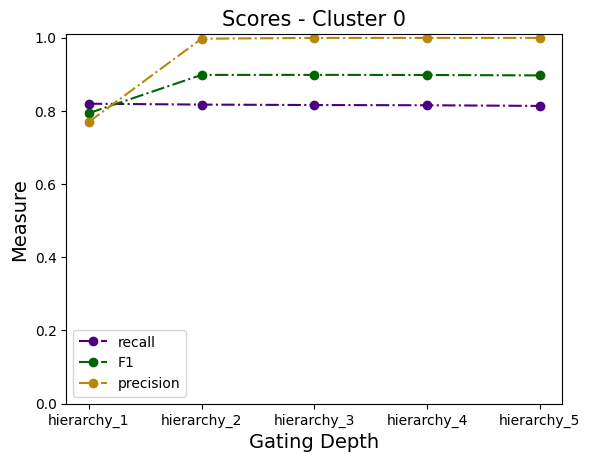

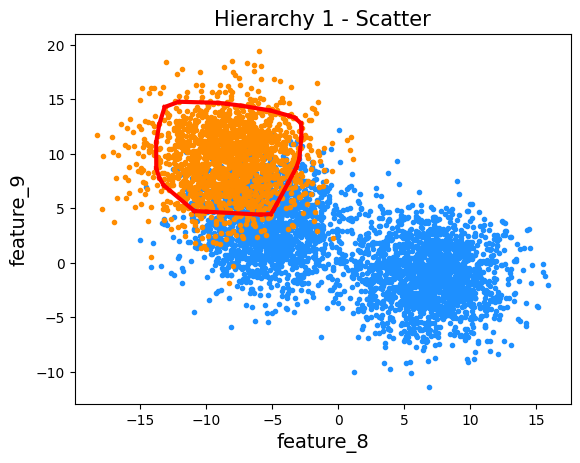

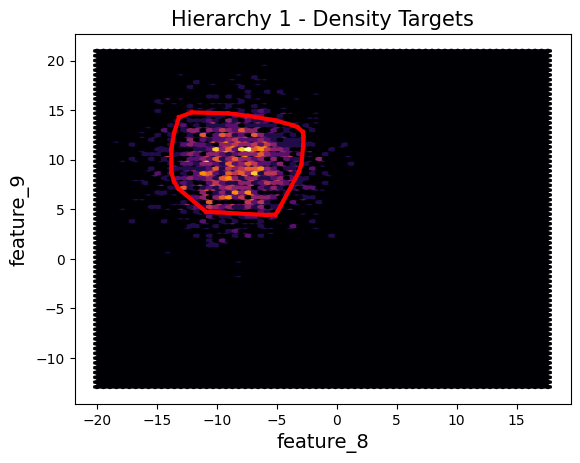

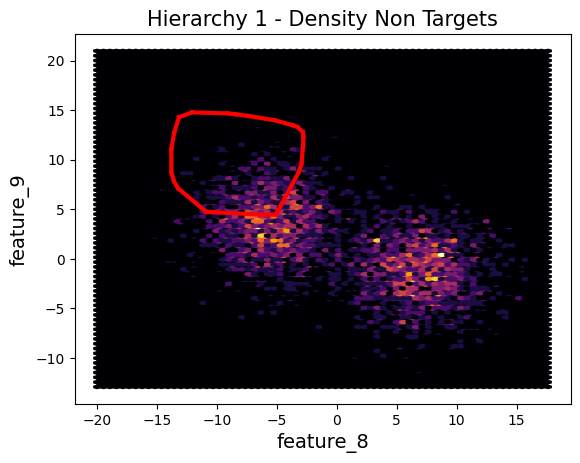

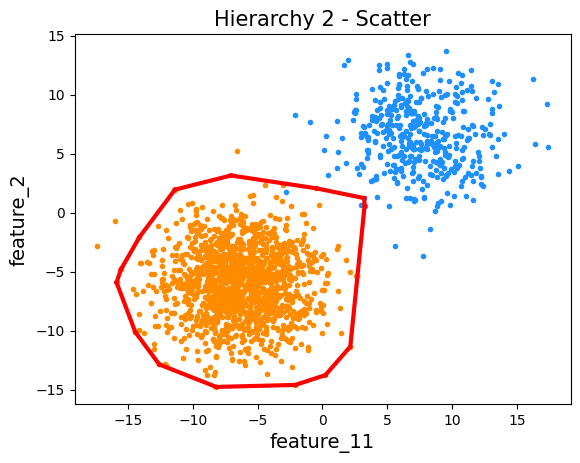

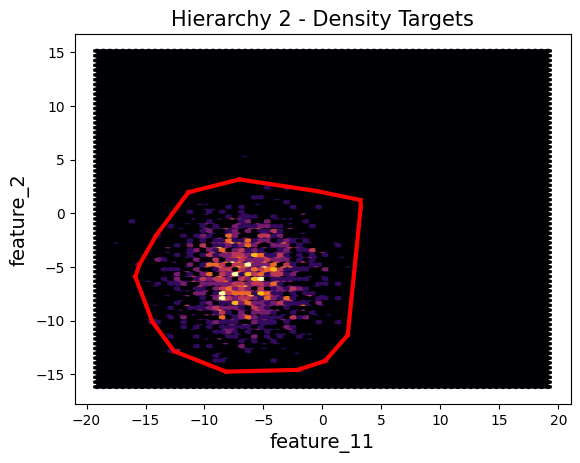

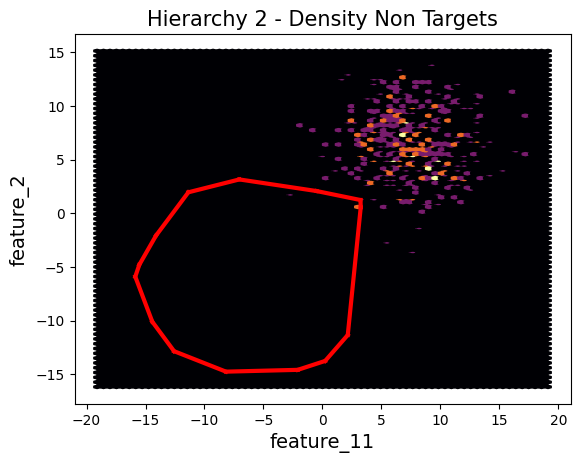

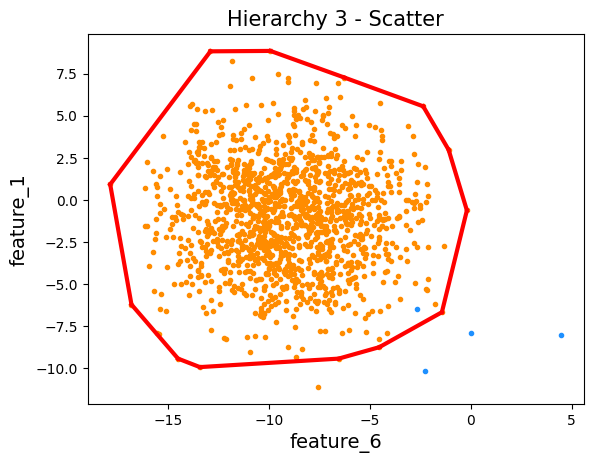

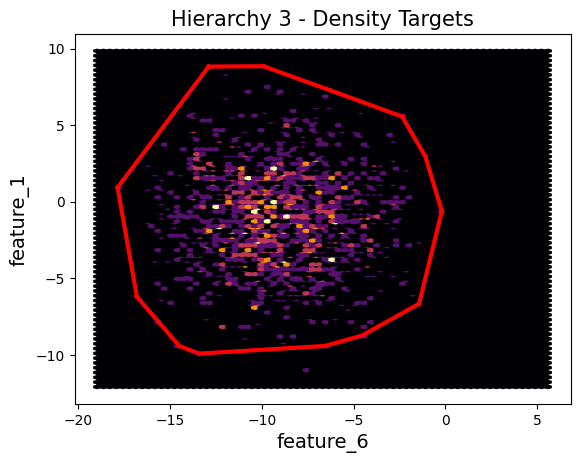

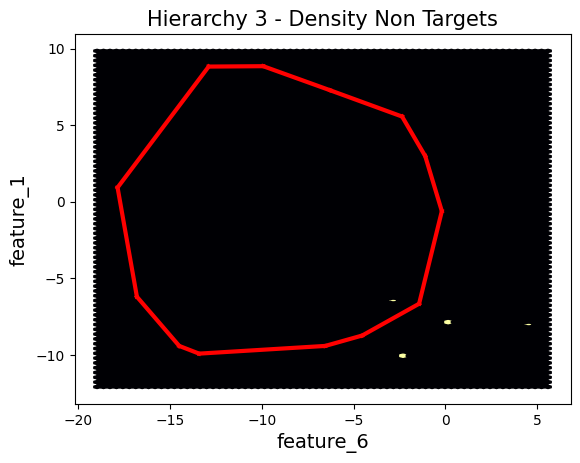

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.986539     0.992762     0.992454     0.992454     0.992150
recall        0.989202     0.987403     0.986203     0.986203     0.985603
precision     0.983890     0.998181     0.998785     0.998785     0.998784


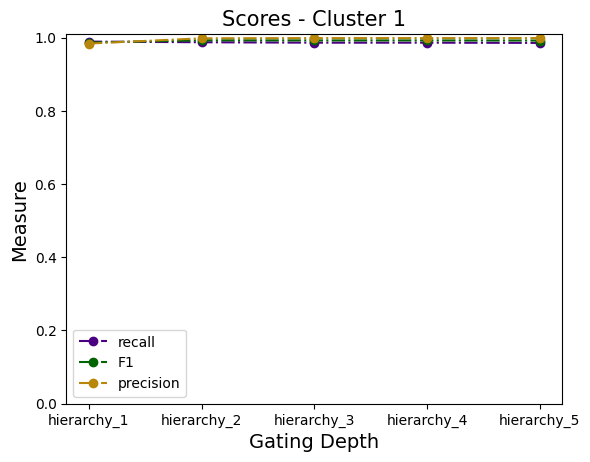

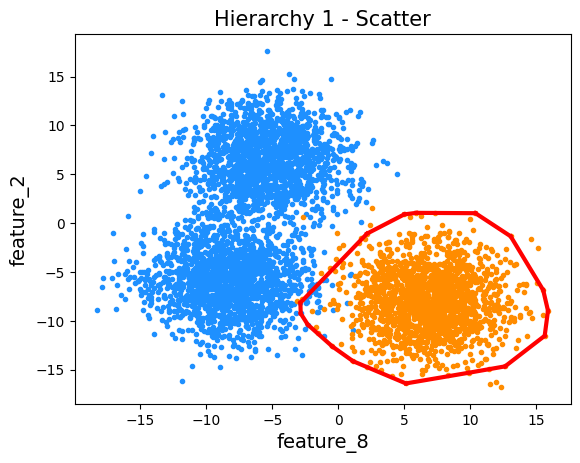

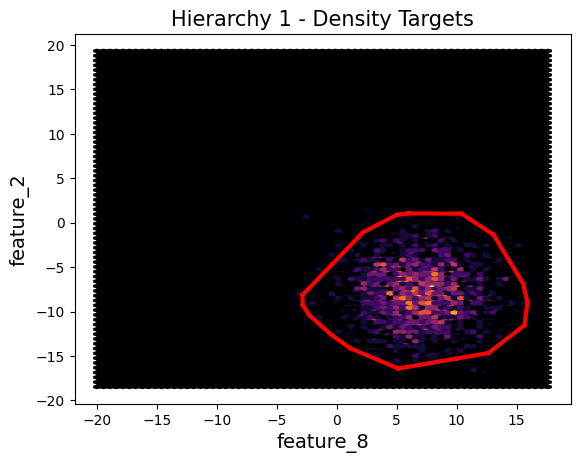

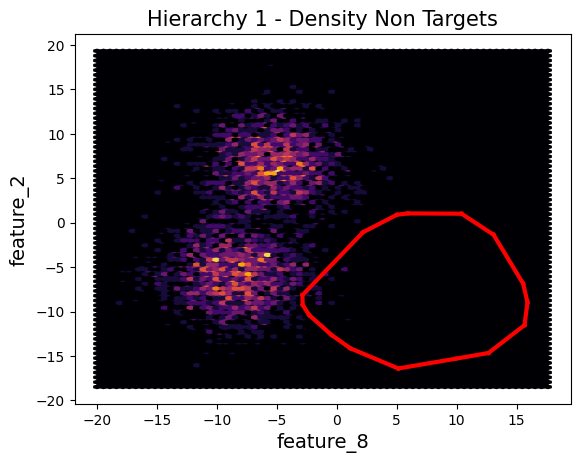

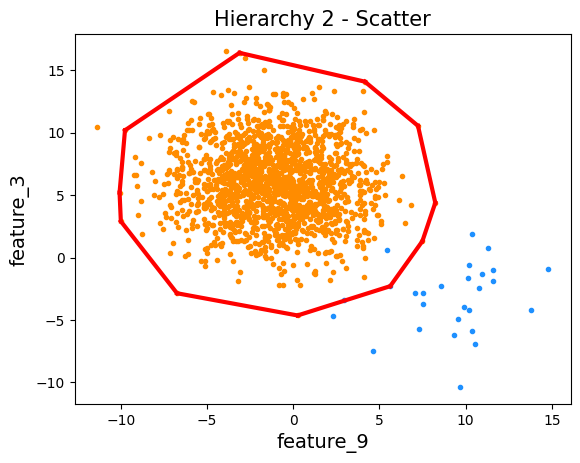

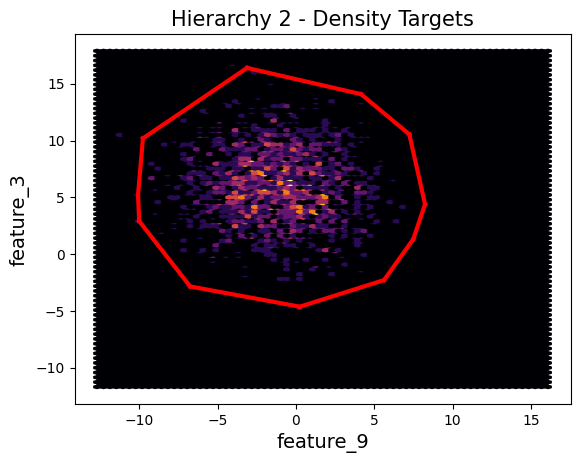

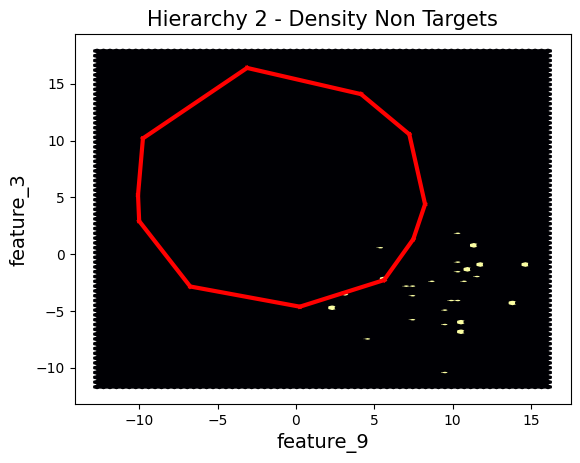

In [4]:
cluster_numbers = pd.unique(adata.obs['louvain'])
cg.tools.gating_strategy(adata,cluster_numbers,cluster_string = 'louvain')



In [2]:
import numpy as np

In [3]:
meta_info = np.load('meta_info.npy',allow_pickle=True).item()

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import os

In [315]:
meta_info = np.load('meta_info.npy',allow_pickle=True).item()

'C:\\Users\\vfriedrich\\projects\\gating\\improve_visualization\\tryout'

In [348]:
def adjust_visualization(meta_info,
                         dict_identifier,
                         hierarchy,
                         save_location,
                         path_separator = '/',
                         gate_color = '#FFA500',targets_color = '#000080',non_targets_color = '#AAAAAA',show = True,save = True):
    
    
    df_hierarchy = meta_info['gating_summary'][dict_identifier][0][hierarchy]
    df_hierarchy['label'] = df_hierarchy['label'].astype(int)
    df_hierarchy['cell_ID'] = df_hierarchy['cell_ID'].astype(int)

    df_marker_combo_hierarchy = meta_info['gating_summary'][dict_identifier][1][hierarchy]['marker_combo']

    population = meta_info['clusterkeys'][dict_identifier]

    inside_gate = df_hierarchy[df_hierarchy['final_pred'] == 1]

    inside_gate_points = inside_gate[df_marker_combo_hierarchy].values

    hull = ConvexHull(inside_gate_points)

    edge_points_indices = hull.vertices

    edge_points = inside_gate_points[edge_points_indices]

    color_map = {0: non_targets_color, 1: targets_color}

    plt.figure(figsize=(6, 4))
    plt.scatter(df_hierarchy[df_marker_combo_hierarchy[0]], df_hierarchy[df_marker_combo_hierarchy[1]], c=df_hierarchy['label'].map(color_map),alpha = 0.4,s=10)
    for simplex in hull.simplices:
        plt.plot(inside_gate_points[simplex, 0], inside_gate_points[simplex, 1], color=gate_color,alpha = 0.7,linewidth = 2.5)
    plt.tight_layout()
    plt.xlabel(df_marker_combo_hierarchy[0],fontsize = 11)
    plt.ylabel(df_marker_combo_hierarchy[1],fontsize = 11)
    plt.title('cluster ' + population + ' - hierarchy ' + hierarchy)
    if save:
        save_ID = 'cluster_' + population + '_hierarchy_' + hierarchy + '.pdf'
        plt.savefig(save_location + path_separator + save_ID,bbox_inches='tight')
    if show:
        plt.show()
    plt.close()
    
    

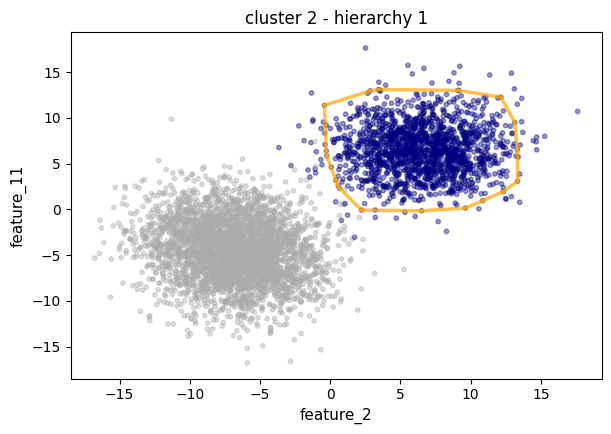

In [349]:
adjust_visualization(meta_info,
                         dict_identifier,'1',
                         save_location = os.getcwd(),path_separator = '\\')

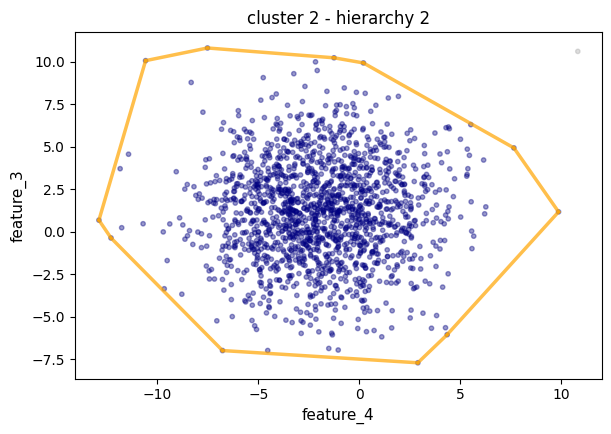

In [350]:
adjust_visualization(meta_info,
                         dict_identifier,'2',
                         save_location = os.getcwd(),path_separator = '\\')